# Principal Component Analysis (PCA)
In this tutorial, we'll cover using PCA to reduce the dimensionality of a dataset.  First, we'll use a generated dataset of blobs.  After that, we'll practice on the DPA_Data_Small dataset that we produced in the previous exercise.    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Workshop Functions
import sys
sys.path.append('..')
from WKDSS320_functions import * 

(200, 3)


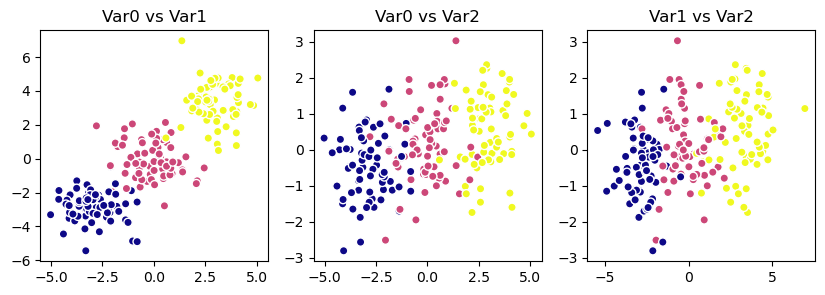

In [3]:
from sklearn.datasets import make_blobs
centers = [(-3, -3, -0.5), (0, 0, 0), (3, 3,0.5)]
X, y = make_blobs(n_samples=200, centers=centers, n_features=3, random_state=1)
print(X.shape)
fig, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].scatter(x=X[:,0],y=X[:,1],c=y,edgecolors='w',cmap='plasma')
ax[0].set_title('Var0 vs Var1')
ax[1].scatter(x=X[:,0],y=X[:,2],c=y,edgecolors='w',cmap='plasma')
ax[1].set_title('Var0 vs Var2')
ax[2].scatter(x=X[:,1],y=X[:,2],c=y,edgecolors='w',cmap='plasma')
ax[2].set_title('Var1 vs Var2')
plt.show()

Apply Scaling:

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Transform using PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

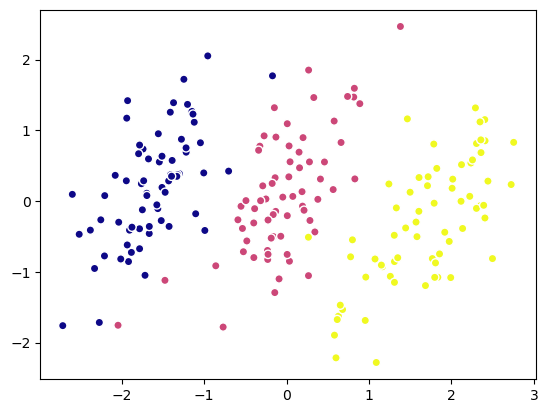

In [53]:
fig, ax = plt.subplots()
ax.scatter(x=X_new[:,0],y=X_new[:,1],c=y,edgecolors='w',cmap='plasma')

### PCA with Differential Power Analysis data
Let's load the DPA dataset from the last lecture and see well PCA works on it

If your data is represented in an (m x n) matrix, you want m>n.  That is, more rows than columns.  

In [2]:
X = pd.read_csv("DPA_Data_Small.csv")
y = pd.read_csv("DPA_target.csv", index_col=0)
y = np.array(y).ravel()

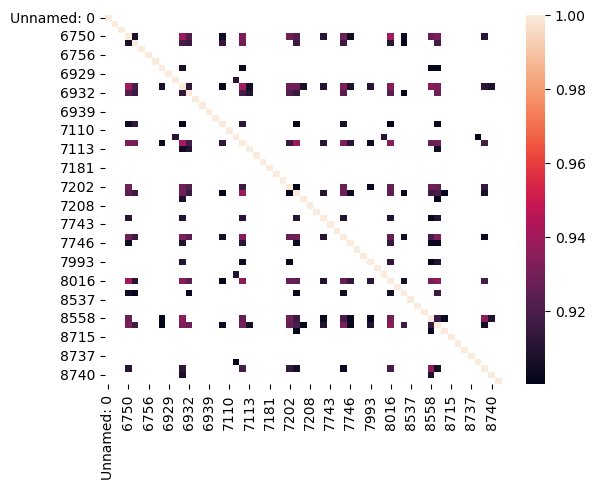

In [3]:
import seaborn as sns
#XCorr = X.corr()>0.5
XCorr0 = X.corr()
XCorr = XCorr0[XCorr0.abs()>0.9]
#print(XCorr.head())
#(X.corr()>0.5).shape
sns.heatmap(data=XCorr)
plt.savefig('DPA Corr 90+ Heatmap.png',bbox_inches ="tight")

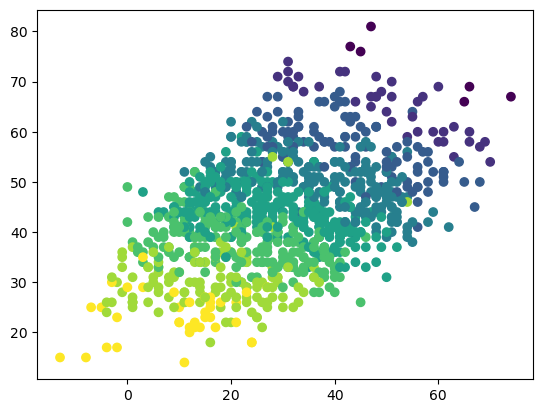

In [4]:

plt.scatter(X.iloc[:,3],X.iloc[:,2],c=y)
plt.savefig('DPA Correlated Variables Scatter.png',bbox_inches ="tight")
plt.show()

In [5]:
RandF_quick_analysis(X.iloc[:,[2,3]],y)

ACCURACY OF THE MODEL:  74.0 %


RandomForestClassifier(random_state=1)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [58]:
from sklearn.decomposition import PCA
pca = PCA() # estimate only 2 PCs

In [59]:
X_new.shape[1]

2

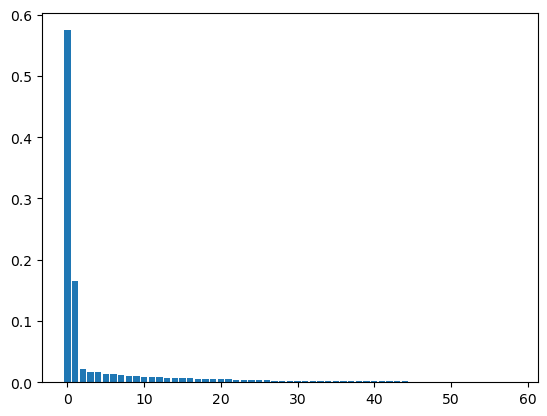

In [60]:
X_new = pca.fit_transform(X) # project the original data into the PCA space
plt.bar(x = range(X_new.shape[1]), height=pca.explained_variance_ratio_)
plt.savefig('DPA Eigenvalues.png',bbox_inches ="tight")
plt.show()

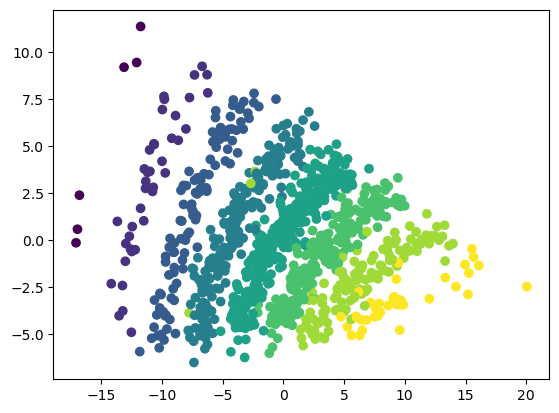

In [68]:
X_new.shape
plt.scatter(X_new[:,0],X_new[:,1],c=y)
plt.savefig('DPA Transformed - first 2 Eigenvectors.png',bbox_inches ="tight")
plt.show()

In [65]:
sum(pca.explained_variance_ratio_[0:28]) # it took 28 components to get explained variance > 95% - not a good candidate for PCA

0.9558593923676304

In [67]:
print(X_new[:,0:2].shape, ' ', y.shape)

(1000, 2)   (1000,)


In [79]:
print('baseline performance before PCA')
RandF_quick_analysis(X,y)

baseline performance before PCA
ACCURACY OF THE MODEL:  0.95 %


RandomForestClassifier(random_state=1)

In [80]:
print('performance on first 2 principal components')
RandF_quick_analysis(X_new[:,0:2],y)

performance on first 2 principal components
ACCURACY OF THE MODEL:  0.94 %


RandomForestClassifier(random_state=1)